<a href="https://colab.research.google.com/github/taliamora/lab-2-phase-2-taliamora/blob/main/DATA_301_Lab_2B_Evidence_of_Discrimination%3F_TALIA_MORA%2C_KITTY_ZHUANG%2C_MICHAEL_GREENE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

Ethnicity
Hispanic              11065.569149
White not Hispanic    24697.548628
Name: Expenditures, dtype: float64

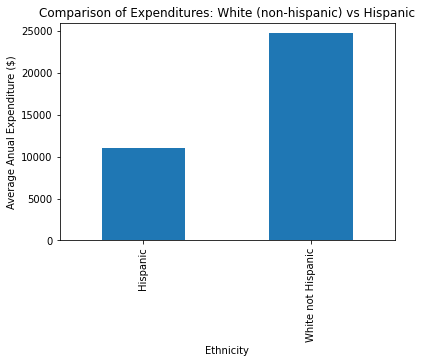

In [1]:
import pandas as pd
import matplotlib as plt

df_dds = pd.read_csv('https://dlsun.github.io/pods/data/ca_dds_expenditures.csv')

ethnicities_of_interest = ['White not Hispanic','Hispanic']
df_hispanic_white = df_dds.loc[df_dds['Ethnicity'].isin(ethnicities_of_interest)]

df_expenditures = df_hispanic_white[['Ethnicity','Expenditures']].groupby('Ethnicity')
expenditure_comp = df_expenditures['Expenditures'].mean()



expenditure_comp.plot.bar(
    title='Comparison of Expenditures: White (non-hispanic) vs Hispanic',
    xlabel='Ethnicity',
    ylabel='Average Anual Expenditure ($)')


expenditure_comp

**There is a clear distinction between the average expenditures alocated to White (non-Hispanic) residents over Hispanic residents**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

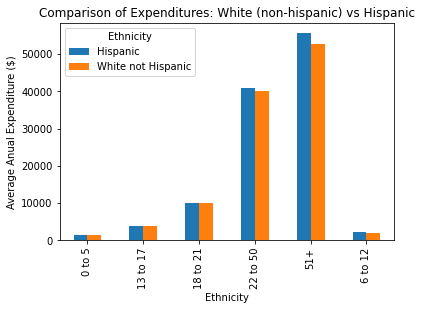

In [2]:
df_expenditures_age = df_hispanic_white[['Ethnicity','Expenditures','Age Cohort']].groupby(['Ethnicity','Age Cohort'])
expenditure_comp_age = df_expenditures_age['Expenditures'].mean()

'''
cols = df_hispanic_white["Ethnicity"].map({
    "White not Hispanic": "blue",
    "Hispanic": "green"
})
'''
expenditure_comp_age = expenditure_comp_age.unstack(level=0)


expenditure_comp_age.plot.bar(
    title='Comparison of Expenditures: White (non-hispanic) vs Hispanic',
    xlabel='Ethnicity',
    ylabel='Average Anual Expenditure ($)')

**Looking purely at the above bar plot it seems as though the allocation of funds to each age group is even between the two ethnicities**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [3]:
joint_eth_age = pd.crosstab(df_hispanic_white['Ethnicity'],df_hispanic_white['Age Cohort'],normalize=True)

eth_totals = joint_eth_age.sum(axis=1)
joint_eth_age.divide(eth_totals,axis=0)

Age Cohort,0 to 5,13 to 17,18 to 21,22 to 50,51+,6 to 12
Ethnicity,,,,,,
Hispanic,0.117021,0.273936,0.207447,0.114362,0.045213,0.242021
White not Hispanic,0.049875,0.167082,0.172070,0.331671,0.164589,0.114713


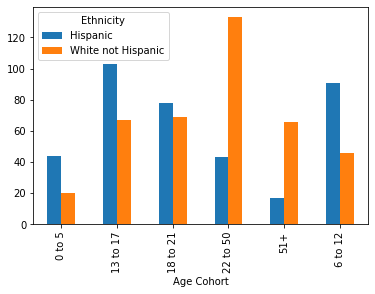

In [4]:
df_White_Hispanic = df_dds.groupby("Ethnicity")["Age Cohort"].value_counts()[["Hispanic","White not Hispanic"]]
df_White_Hispanic.unstack(level = 0).plot.bar()

**Although at first the initial bar plot seemed to indicate that the allocation of funds to each age group is even between the two ethnicities, this does not account for the size of each age cohort. Further analyses reveals that the majority of White individuals fall in the 22 to 50 age range (which has a significant allocation of funds for both ethnicities) whereas the majority of Hispanic individuals fall within the 13-17 age range and this is one of the lowest allocations of funds.**

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2B - YOUR NAME HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.